<font size = 6>Отбор данных одномерной выборки

Выполнила: Юшко Анастасия Александровна (ММБ-104)

#Введение

Цель работы – очистка данных одномерной выборки, т.е. поиск и удаление аномальных значений.

Подключаем библиотеки pandas, matplotlib.pyplot, numpy, scipy.stats

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Импортируем данные из файла ML.ds1.csv в новую переменную ds0.

In [35]:
ds0 = pd.read_csv('/content/ML.ds1.csv')

Выводим первые 6 строк данных

In [36]:
ds0.head(6)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75
0,1.674664,-0.105114,1.123071,0.159780,-2.653400,0.731480,0.248630,-2.411234,0.975680,9.011194,...,0.635269,0.766523,1.108400,1.075446,6.565005,0.839696,0.496592,0.728681,-1.186913,0.871300
1,1.815983,0.793212,0.437694,1.374387,-0.055956,0.678019,0.245999,2.632142,1.094653,1.099596,...,0.967244,0.973246,4.109887,1.034150,9.851633,7.415128,0.583847,1.338758,2.582966,1.162462
2,0.777174,-1.030174,0.439461,1.371726,1.605366,0.695225,0.969702,2.473882,0.910368,4.997584,...,0.517114,5.820453,-2.094585,1.047369,9.560367,-1.748572,0.778761,1.445412,-4.385701,0.858215
3,1.030925,1.576539,0.906160,1.028792,-0.723862,0.626546,0.321099,-4.724615,1.039090,6.129512,...,0.627821,0.499243,-7.330234,0.768444,2.383294,1.495813,0.833851,1.649441,-0.528993,0.695496
4,0.872935,-0.723648,1.163915,3.085364,0.129386,0.896113,1.215447,0.969162,0.972609,7.535088,...,0.589966,1.972031,0.225700,0.943955,8.833605,11.804698,0.518266,1.615040,0.328252,1.025233
5,0.933576,3.575696,1.290449,2.041408,-0.401215,0.569394,5.372170,4.854912,0.990293,4.203574,...,0.854602,0.893579,-0.311770,0.809873,3.677552,5.458099,0.540558,0.775678,-2.894256,0.851994


Выделяем в отдельную таблицу ds столбец с номером 47, заменив с помощью функции rename букву v на s

In [37]:
ds = ds0[['v47']].rename({'v47': 's47'}, axis='columns')
ds

,s47
0,-4.050084
1,8.675948
2,-1.001523
3,2.563001
4,-0.544271
...,...
495,-5.609841
496,-2.646267
497,-1.608056
498,-3.104724


## Нахождение описательной статистики выборки

Расчет описательной характеристики

In [38]:
ds.describe()

,s47
count,500.000000
mean,0.136365
std,2.519439
min,-8.239096
25%,-1.199532
50%,0.013015
75%,1.477210
max,8.817986


Расчитает числовые характеристики выборки

**mean()** - среднее выборочное, т.е то оценка математического ожидания генеральной совокупности, представленной имеющейся выборкой. Среднее выборочное является средним значением всех элементов выборки.

In [39]:
ds_mean = ds['s47'].mean()
ds_mean

0.13636517600384906

**std()** - стандартное отклонение, т.е мера разброса данных относительно их среднего значения. Оно показывает, насколько значения выборки распределены относительно среднего значения.

In [40]:
ds_std = ds['s47'].std()
ds_std

2.5194388425592877

**meadian()** - выборочная медиана, т.е значение, которое делит упорядоченную выборку пополам. То есть, 50% значений выборки меньше медианы, а 50% — больше.

In [41]:
ds_median = ds['s47'].median()
ds_median

0.01301544815089

**skew()** - выборочный коэффициент асимметрии, т.е оценка коэффициента асимметрии генеральной совокупности. Показывает, насколько данные скошены относительно среднего значения и в какую сторону.

In [42]:
ds_skewness = ds['s47'].skew()
ds_skewness

0.2156790623596383

Эти характеристики помогают понять распределение данных в выборке и сделать выводы о генеральной совокупности на основе имеющихся данных.

Создаем таблицу с перечисленными выше характеристиками. Организовываем
список с названиями характеристик, список с их значениями, применив функцию
DataFrame пакета pd.

In [43]:
characteristics = ['Среднее выборочное', 'Стандартное отклонение', 'Выборочная медиана', 'Выборочный коэффициент асимметрии']
values = [ds_mean, ds_std, ds_median, ds_skewness]

df = pd.DataFrame(values, characteristics, columns = ['Значение']).T
df

,Среднее выборочное,Стандартное отклонение,Выборочная медиана,Выборочный коэффициент асимметрии
Значение,0.136365,2.519439,0.013015,0.215679


# Визуализация данных

## Построение диграммы рассеивания

Scatterplot обычно используется для визуализации двух переменных, чтобы показать связь между ними. Тк у нас есть только один столбец, то нужно добавить вторую переменную.

Поэтому мы создаем вторую переменную, которая будет содержать индексы элементов в вашем столбце чисел, и затем построить scatterplot с этими данными.

In [44]:
indices = range(len(ds))

C помощью функции **scatter** пакета matplotlib.pyplot построим
диаграмму рассеияния выборки, расположив выборочные значения по
горизонтальной оси.

На диаграмме отобразим названия самой диаграммы, с помощью **title()** и
ее координатных осей, используя **xlabel()** и **ylabel()**

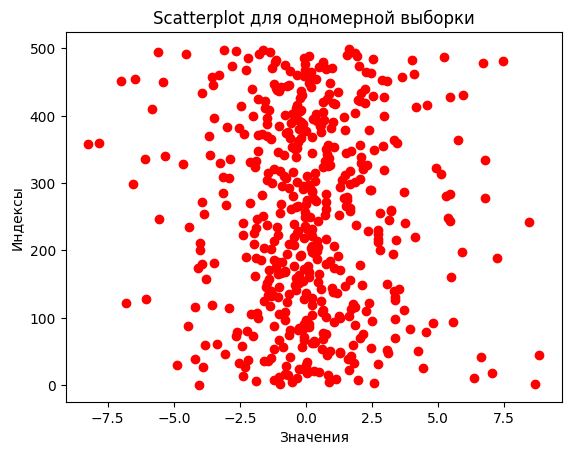

In [45]:
plt.scatter(ds, indices,color = 'red')
plt.xlabel('Значения')
plt.ylabel('Индексы')
plt.title('Scatterplot для одномерной выборки')
plt.show()

Анализ одномерной выборки на основе диаграммы рассеивания показывает следующее:

---



1) Основная концентрация значений находится в диапазоне от -2.5 до 2.5. Выбросы, такие как максимальное значение (8.817986) и минимальное (-8.239096), считаются аномалиями, так как они значительно отличаются от основной группы значений.

2) Можно предположить, что распределение генеральной совокупности **симметрично**. Близкое расположение медианы и среднего обычно свидетельствует о симметричном распределении данных в выборке. Основной скопление значений наблюдается вблизи 0, а максимальное и минимальное значения близки друг к другу по модулю, что способствует созданию симметричного графика значений, без сдвига в какую либо сторону

## Построение диаграммы размаха

C помощью функции boxplot пакета matplotlib.pyplot построим диаграмму размаха.

Указываем свойство **vert = 0**, чтобы отобразить диаграмму горизонтально

Для изменение цветовой гаммы диаграммы задаем свойство **patch_artist=True**, которое позволяет обозначить, что мы будем вносить некие изменения.

**boxprops** - позволяет изменить цвет внутренности бокса

**capprops** - позволяет изменить цвет концов "усов"

**flierprors** - позволяет изменить цвет выбросов

**medianprops** - позволяет изменить цвет медианы

На диаграмме отображаем названия самой диаграммы и ее горизонтальной оси.

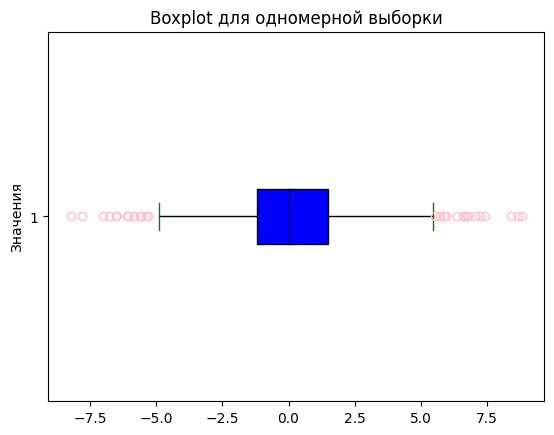

In [46]:
plt.boxplot(ds, vert = 0,  patch_artist=True,
      boxprops=dict(facecolor="blue"),
      capprops=dict(color="green"),
      flierprops=dict(markeredgecolor="pink"),
      medianprops=dict(color="black"))
plt.ylabel('Значения')
plt.title('Boxplot для одномерной выборки')
plt.show()

*Линия внутри бокса* - медиана

*Боковины бокса* - это 1 и 3 квантиль ( 25 и 75 процентили)

*Концы усов* - максимальное и минимальное значения, с исключением выбросов

*Значения за усами* - выбросы

**Выбросы ( аномалии )** - значения, значительно отличающиеся от остальных значений

Анализ одномерной выборки на основе диаграммы размаха показывает следующее:

---



1) График имеет выбросы которые находятся примерно за пределами значений <-5.0 и >5.5

2) Скорее всего генеральная совокупность симметрична, тк наблюдается симметричность выбросов и примерное равенство усов. Нормальные значения без выбросов находятся примерно симметрично нуля и распределены от -5 до 5.5

## Построение гистограммы

Построим гистограмму с добавлением линии плотности нормального распределения

C помощью функции hist пакета matplotlib.pyplot построим гистограмму
относительных частот.

Добавим на полученный рисунок линию плотности нормального распределения.

Для этого сначала зададим множество значений аргумента (от минимального до максимального элемента выборки) с помощью функции linspace пакета numpy

Затем зададим значения ординат точек графика с помощью функции norm.prd()

Затем построим с помощью функции plot пакета matplotlib.pyplot кривую плотности

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


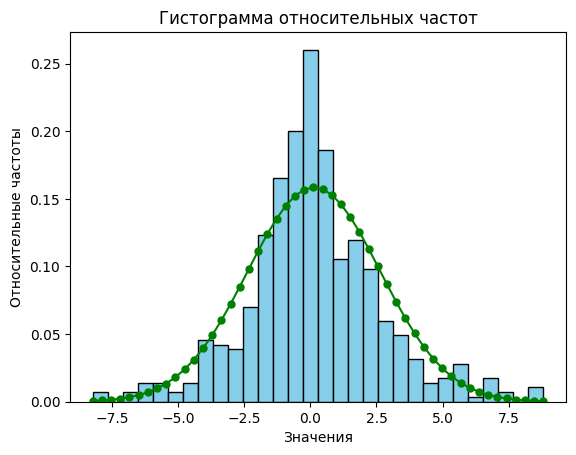

In [47]:
plt.hist(ds, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значения')
plt.ylabel('Относительные частоты')

from scipy.stats import norm
x = np.linspace(min(ds['s47']), max(ds['s47']))
y = norm.pdf(x, np.mean(ds), np.std(ds))
plt.plot(x, y, color='green', marker='o', markersize=5)

plt.show()

Анализ одномерной выборки на основе гистограммы показывает следующее:

---



Гистограммы и линии плотности нормального распределения говорит о том, что данные распределены равномерно вокруг среднего значения и отклонения от этого значения равнозначны как в положительном, так и в отрицательном направлении.

Исходя из диаграммы, скорее всего генеральная совокупность имеет нормальное распределение и является симметричной


## Итоги анализа диаграмм

По- видимому, распределение генеральной совокупности является симметричным, это обусловлена равномерным распределением данных вокруг их среднего значения, а также наличием баланса отклонений значений в разных направлениях. Близкое расположение медианы и среднего значения также помогает нам сделать вывод о предполагаемой симметричности совокупности

Также в данной выборке присутствуют аномалии, которые значительно отличаются от основных значений.

# Проверка на симметричность

Проведем первый тест основанный на сравнении выборочного среднего с выборочной медианой, для этого вычислим наблюдаемое заначение и критическое

Расчитаем наблюдаемое значение

In [48]:
xn1 = abs(ds_mean - ds_median)
xn1

0.12334972785295906

Расчитаем критическое значение

In [49]:
xk1 = (3*ds_std)/(np.sqrt(500))
xk1

0.33801819102695746

Наблюдаемое значение получилось меньше критического, следовательно гипотеза о симметричности генеральной совокупности принимается.

---



Проведем второй тест основанный на оценке величины выборочного коэффициента асимметричности, для этого вычислим наблюдаемое заначение и критическое

Наблюдаемое значение

In [50]:
xn2 = abs(ds_skewness)
xn2

0.2156790623596383

Критическое значение

In [51]:
q = 500
xk2 = 3*np.sqrt((6*(q - 1))/((q + 1)*(q + 3)))
xk2

0.3269973982840565

Наблюдаемое значение получилось меньше критического, следовательно гипотеза о симметричности генеральной совокупности принимается.

Исходя из проведенных тестов можно сделать вывод :

---

Генеральная совокупность является симметричной на основании анализа результатов тестов

#Отбор данных

На основе исследования симметричности генеральной совокупности считаю, что интервалом, который будет использоваться для отбора данных является **(-5 , 5.5)**

Попробую проверить свою теорию используя процедуру отбора данных (поиска выбросов)

Вычислим границы A и B интервала для отбора данных.


Для этого сначала расчитаем 25 и 75 процентили.

In [52]:
q25 = ds['s47'].quantile(0.25)
q75 = ds['s47'].quantile(0.75)
q25,q75

(-1.19953194726176, 1.4772099158253025)

Далее воспользуемся формулами [a-1.5(b-a), b+1.5(b-a)]

In [53]:
A = q25-1.5*(q75-q25)
B = q75+1.5*(q75-q25)
A,B

(-5.214644741892354, 5.4923227104558965)

Используя ограничения на элементы столбца с данными, выясним, какие
выборочные значения находятся вне интервала

In [54]:
dni=ds[(ds['s47']>=B) | (ds['s47']<=A)]
print('Количество значений:',len(dni.value_counts()),'\n')
dni.value_counts()

Количество значений: 28 



s47      
-8.239096    1
-7.816632    1
 8.675948    1
 8.430028    1
 7.442695    1
 7.244014    1
 7.038364    1
 6.785812    1
 6.761262    1
 6.687870    1
 6.616698    1
 6.368245    1
 5.944391    1
 5.896268    1
 5.737622    1
 5.550457    1
-5.322700    1
-5.405383    1
-5.576276    1
-5.609841    1
-5.844455    1
-6.053128    1
-6.103045    1
-6.477900    1
-6.526384    1
-6.806427    1
-6.999186    1
 8.817986    1
dtype: int64

Введем новую таблицу с отобранными данными

In [55]:
di=ds[(ds['s47']<B) & (ds['s47']>A)]
di

,s47
0,-4.050084
2,-1.001523
3,2.563001
4,-0.544271
5,0.863205
...,...
494,-1.353956
496,-2.646267
497,-1.608056
498,-3.104724


Итоги очистки данных:

---



Как можно заметить их стало 472, вместо 500. Как раз исключились 28 значений, не вошедшие в интервал.

Это поможет повысить качество данных, которые можно использовать для дальнейшего анализа.

#Заключение

Выполнена поставленная цель - произведена очистка данных одномерной выборки, т.е. поиск и удаление аномальных значений.


Были использованы библиотеки: pandas, matplotlib.pyplot, numpy, scipy.stats.

Визуализированы и проанализированы диаграммы рассеяния, размаха и гистограмма, проведена проверка генеральной совокупности на симметричность и произведен отбор данных.

На основе данного анализа сделаны предварительные выводы, что

1. Данная генеральная совокупность является симметричной
2. В ней присутсвиуют выбросы

На основании двух тестов гипотеза о симметричности генеральной совокупности подтверждена.

На основе анализа диаграмм и при отборе данных было обнаружено 28 аномальных значений